<a href="https://colab.research.google.com/github/akiabe/coding-practice/blob/master/kaggle_imdb_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Project/imdb_review/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import pandas as pd
df = pd.read_csv("../tmp/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
sentence = "hi, how are you?"
#sentence.split()
word_tokenize(sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['hi', ',', 'how', 'are', 'you', '?']

In [ ]:
# test (CountVectorizer)
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
          "hello, how are you?",
          "im getting bored at home. And you? What do you think?",
          "did you know about counts",
          "let's see if this works!",
          "YES!!!"
]

ctv = CountVectorizer()
ctv.fit(corpus)
corpus_transformed = ctv.transform(corpus)
print(corpus_transformed)

  (0, 2)	1
  (0, 9)	1
  (0, 11)	1
  (0, 22)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 7)	1
  (1, 8)	1
  (1, 10)	1
  (1, 13)	1
  (1, 17)	1
  (1, 19)	1
  (1, 22)	2
  (2, 0)	1
  (2, 5)	1
  (2, 6)	1
  (2, 14)	1
  (2, 22)	1
  (3, 12)	1
  (3, 15)	1
  (3, 16)	1
  (3, 18)	1
  (3, 20)	1
  (4, 21)	1


In [ ]:
print(ctv.vocabulary_)

{'hello': 9, 'how': 11, 'are': 2, 'you': 22, 'im': 13, 'getting': 8, 'bored': 4, 'at': 3, 'home': 10, 'and': 1, 'what': 19, 'do': 7, 'think': 17, 'did': 6, 'know': 14, 'about': 0, 'counts': 5, 'let': 15, 'see': 16, 'if': 12, 'this': 18, 'works': 20, 'yes': 21}


In [ ]:
# test (CountVectorizer, word_tokenize)
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

corpus = [
          "hello, how are you?",
          "im getting bored at home. And you? What do you think?",
          "did you know about counts",
          "let's see if this works!",
          "YES!!!"
]

ctv = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
ctv.fit(corpus)
corpus_transformed = ctv.transform(corpus)
print(ctv.vocabulary_)

{'hello': 14, ',': 2, 'how': 16, 'are': 7, 'you': 27, '?': 4, 'im': 18, 'getting': 13, 'bored': 9, 'at': 8, 'home': 15, '.': 3, 'and': 6, 'what': 24, 'do': 12, 'think': 22, 'did': 11, 'know': 19, 'about': 5, 'counts': 10, 'let': 20, "'s": 1, 'see': 21, 'if': 17, 'this': 23, 'works': 25, '!': 0, 'yes': 26}


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


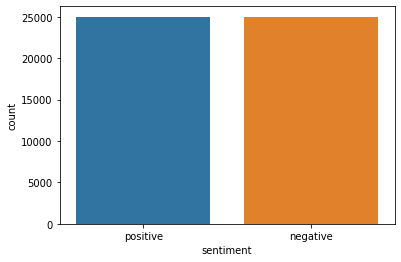

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="sentiment", data=df)
plt.show()

In [ ]:
# benchmark(logistic regression)
import pandas as pd

from nltk.tokenize import word_tokenize
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer

if __name__ == "__main__":
  df = pd.read_csv("../tmp/IMDB Dataset.csv")

  df.sentiment = df.sentiment.apply(
      lambda x: 1 if x == "positive" else 0
  )

  df["kfold"] = -1
  
  df = df.sample(frac=1).reset_index(drop=True)
  
  y = df.sentiment.values
  
  kf = model_selection.StratifiedKFold(n_splits=5)

  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
  
  for fold_ in range(5):
    train_df = df[df.kfold != fold_].reset_index(drop=True)
    test_df = df[df.kfold == fold_].reset_index(drop=True)

    count_vec = CountVectorizer(
        tokenizer=word_tokenize,
        token_pattern=None
    )

    count_vec.fit(train_df.review)

    xtrain = count_vec.transform(train_df.review)
    xtest = count_vec.transform(test_df.review)

    model = linear_model.LogisticRegression()

    model.fit(xtrain, train_df.sentiment)

    preds = model.predict(xtest)

    accuracy = metrics.accuracy_score(test_df.sentiment, preds)

    print(f"Fold : {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold : 0
Accuracy = 0.8902



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold : 1
Accuracy = 0.8971



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold : 2
Accuracy = 0.895



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold : 3
Accuracy = 0.8892

Fold : 4
Accuracy = 0.8922



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# other model (naive bayes)
import pandas as pd

from nltk.tokenize import word_tokenize
from sklearn import naive_bayes
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer

if __name__ == "__main__":
  df = pd.read_csv("../tmp/IMDB Dataset.csv")

  df.sentiment = df.sentiment.apply(
      lambda x: 1 if x == "positive" else 0
  )

  df["kfold"] = -1
  
  df = df.sample(frac=1).reset_index(drop=True)
  
  y = df.sentiment.values
  
  kf = model_selection.StratifiedKFold(n_splits=5)

  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
  
  for fold_ in range(5):
    train_df = df[df.kfold != fold_].reset_index(drop=True)
    test_df = df[df.kfold == fold_].reset_index(drop=True)

    count_vec = CountVectorizer(
        tokenizer=word_tokenize,
        token_pattern=None
    )

    count_vec.fit(train_df.review)

    xtrain = count_vec.transform(train_df.review)
    xtest = count_vec.transform(test_df.review)

    model = naive_bayes.MultinomialNB()

    model.fit(xtrain, train_df.sentiment)

    preds = model.predict(xtest)

    accuracy = metrics.accuracy_score(test_df.sentiment, preds)

    print(f"Fold : {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

Fold : 0
Accuracy = 0.8472

Fold : 1
Accuracy = 0.8409

Fold : 2
Accuracy = 0.8536

Fold : 3
Accuracy = 0.8399

Fold : 4
Accuracy = 0.8425



In [ ]:
# test (TfidfVectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

corpus = [
          "hello, how are you?",
          "im getting bored at home. And you? What do you think?",
          "did you know about counts",
          "let's see if this works!",
          "YES!!!"
]

tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
tfv.fit(corpus)
corpus_transformed = tfv.transform(corpus)
print(corpus_transformed)

  (0, 27)	0.2965698850220162
  (0, 16)	0.4428321995085722
  (0, 14)	0.4428321995085722
  (0, 7)	0.4428321995085722
  (0, 4)	0.35727423026525224
  (0, 2)	0.4428321995085722
  (1, 27)	0.35299699146792735
  (1, 24)	0.2635440111190765
  (1, 22)	0.2635440111190765
  (1, 18)	0.2635440111190765
  (1, 15)	0.2635440111190765
  (1, 13)	0.2635440111190765
  (1, 12)	0.2635440111190765
  (1, 9)	0.2635440111190765
  (1, 8)	0.2635440111190765
  (1, 6)	0.2635440111190765
  (1, 4)	0.42525129752567803
  (1, 3)	0.2635440111190765
  (2, 27)	0.31752680284846835
  (2, 19)	0.4741246485558491
  (2, 11)	0.4741246485558491
  (2, 10)	0.4741246485558491
  (2, 5)	0.4741246485558491
  (3, 25)	0.38775666010579296
  (3, 23)	0.38775666010579296
  (3, 21)	0.38775666010579296
  (3, 20)	0.38775666010579296
  (3, 17)	0.38775666010579296
  (3, 1)	0.38775666010579296
  (3, 0)	0.3128396318588854
  (4, 26)	0.3818506296777547
  (4, 0)	0.9242240510908069


In [ ]:
print(tfv.vocabulary_)

{'hello': 14, ',': 2, 'how': 16, 'are': 7, 'you': 27, '?': 4, 'im': 18, 'getting': 13, 'bored': 9, 'at': 8, 'home': 15, '.': 3, 'and': 6, 'what': 24, 'do': 12, 'think': 22, 'did': 11, 'know': 19, 'about': 5, 'counts': 10, 'let': 20, "'s": 1, 'see': 21, 'if': 17, 'this': 23, 'works': 25, '!': 0, 'yes': 26}


In [ ]:
# tfidf, Logistic Regression
import pandas as pd

from nltk.tokenize import word_tokenize
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer

if __name__ == "__main__":
  df = pd.read_csv("../tmp/IMDB Dataset.csv")

  df.sentiment = df.sentiment.apply(
      lambda x: 1 if x == "positive" else 0
  )

  df["kfold"] = -1
  
  df = df.sample(frac=1).reset_index(drop=True)
  
  y = df.sentiment.values
  
  kf = model_selection.StratifiedKFold(n_splits=5)

  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
  
  for fold_ in range(5):
    train_df = df[df.kfold != fold_].reset_index(drop=True)
    test_df = df[df.kfold == fold_].reset_index(drop=True)

    tfidf_vec = TfidfVectorizer(
        tokenizer=word_tokenize,
        token_pattern=None
    )

    tfidf_vec.fit(train_df.review)

    xtrain = tfidf_vec.transform(train_df.review)
    xtest = tfidf_vec.transform(test_df.review)

    model = linear_model.LogisticRegression()

    model.fit(xtrain, train_df.sentiment)

    preds = model.predict(xtest)

    accuracy = metrics.accuracy_score(test_df.sentiment, preds)

    print(f"Fold : {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

Fold : 0
Accuracy = 0.9001

Fold : 1
Accuracy = 0.8999

Fold : 2
Accuracy = 0.8902



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold : 3
Accuracy = 0.8982

Fold : 4
Accuracy = 0.8959



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# test (n-grams)
from nltk import ngrams
from nltk.tokenize import word_tokenize

N = 3
sentence = "hi, how are you?"
tokenized_sentence = word_tokenize(sentence)
print("tokenized_sentence :")
print(tokenized_sentence)
print()
n_grams = list(ngrams(tokenized_sentence, N))
print("n_grams :")
print(n_grams)
print()

tokenized_sentence :
['hi', ',', 'how', 'are', 'you', '?']

n_grams :
[('hi', ',', 'how'), (',', 'how', 'are'), ('how', 'are', 'you'), ('are', 'you', '?')]



In [ ]:
# tfidf, Logistic Regression
import pandas as pd

from nltk.tokenize import word_tokenize
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer

if __name__ == "__main__":
  df = pd.read_csv("../tmp/IMDB Dataset.csv")

  df.sentiment = df.sentiment.apply(
      lambda x: 1 if x == "positive" else 0
  )

  df["kfold"] = -1
  
  df = df.sample(frac=1).reset_index(drop=True)
  
  y = df.sentiment.values
  
  kf = model_selection.StratifiedKFold(n_splits=5)

  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
  
  for fold_ in range(5):
    train_df = df[df.kfold != fold_].reset_index(drop=True)
    test_df = df[df.kfold == fold_].reset_index(drop=True)

    tfidf_vec = TfidfVectorizer(
        tokenizer=word_tokenize,
        token_pattern=None,
        ngram_range=(1, 3)
    )

    tfidf_vec.fit(train_df.review)

    xtrain = tfidf_vec.transform(train_df.review)
    xtest = tfidf_vec.transform(test_df.review)

    model = linear_model.LogisticRegression()

    model.fit(xtrain, train_df.sentiment)

    preds = model.predict(xtest)

    accuracy = metrics.accuracy_score(test_df.sentiment, preds)

    print(f"Fold : {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold : 0
Accuracy = 0.8946



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold : 1
Accuracy = 0.8935

Fold : 2
Accuracy = 0.8923

Fold : 3
Accuracy = 0.8867

Fold : 4
Accuracy = 0.8933



In [ ]:
# test (kfold)
import numpy as np
from sklearn.model_selection import KFold

x = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17, 18], [19, 20]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

kf = KFold(n_splits=5)
for fold, (t_idx, v_idx) in enumerate(kf.split(x, y)):
  print(fold)
  print(t_idx)
  print(v_idx)


0
[2 3 4 5 6 7 8 9]
[0 1]
1
[0 1 4 5 6 7 8 9]
[2 3]
2
[0 1 2 3 6 7 8 9]
[4 5]
3
[0 1 2 3 4 5 8 9]
[6 7]
4
[0 1 2 3 4 5 6 7]
[8 9]


In [ ]:
import pandas as pd
from sklearn import model_selection

df = pd.read_csv("/content/drive/My Drive/Project/imdb_review/IMDB Dataset.csv")
print(df.shape)

df.sentiment = df.sentiment.apply(
    lambda x: 1 if x == "positive" else 0
)

df["kfold"] = -1  
df = df.sample(frac=1).reset_index(drop=True)
y = df.sentiment.values

kf = model_selection.StratifiedKFold(n_splits=5)

for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
  print("train_idx and kfold")
  print()
  print(df.loc[t_, 'kfold'])
  print()
  print("val_idx and kfold")
  print()
  print(df.loc[v_, 'kfold'])
  print()
  df.loc[v_, 'kfold'] = f
  print("val_idx and replace kfold number")
  print()
  print(df.loc[v_, 'kfold'])
  print()

#df.to_csv("/content/drive/My Drive/Project/imdb_review/train_folds.csv", index=False)


(50000, 2)
train_idx and kfold

9941    -1
9946    -1
9947    -1
9949    -1
9952    -1
        ..
49995   -1
49996   -1
49997   -1
49998   -1
49999   -1
Name: kfold, Length: 40000, dtype: int64

val_idx and kfold

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
10039   -1
10040   -1
10041   -1
10043   -1
10044   -1
Name: kfold, Length: 10000, dtype: int64

val_idx and replace kfold number

0        0
1        0
2        0
3        0
4        0
        ..
10039    0
10040    0
10041    0
10043    0
10044    0
Name: kfold, Length: 10000, dtype: int64

train_idx and kfold

0        0
1        0
2        0
3        0
4        0
        ..
49995   -1
49996   -1
49997   -1
49998   -1
49999   -1
Name: kfold, Length: 40000, dtype: int64

val_idx and kfold

9941    -1
9946    -1
9947    -1
9949    -1
9952    -1
        ..
20203   -1
20204   -1
20206   -1
20207   -1
20208   -1
Name: kfold, Length: 10000, dtype: int64

val_idx and replace kfold number

9941     1
9946     1
9947

In [ ]:
# test (Snowball Stemmer and WordNet Lemmatizer)
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

words = ["fishing", "fishes", "fished"]

for word in words:
  print(f"word={word}")
  print(f"stemmed_word={stemmer.stem(word)}")
  print(f"lemma={lemmatizer.lemmatize(word)}")
  print()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
word=fishing
stemmed_word=fish
lemma=fishing

word=fishes
stemmed_word=fish
lemma=fish

word=fished
stemmed_word=fish
lemma=fished



In [ ]:
# stemming or lemmatization and naive bayes
import pandas as pd

from nltk.stem import WordNetLemmatizer
#from nltk.stem.snowball import SnowballStemmer
from sklearn import naive_bayes
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer

if __name__ == "__main__":
  df = pd.read_csv("/content/drive/My Drive/Project/imdb_review/IMDB Dataset.csv")

  df.sentiment = df.sentiment.apply(
      lambda x: 1 if x == "positive" else 0
  )

  df["kfold"] = -1

  df = df.sample(frac=1).reset_index(drop=True)
  
  y = df.sentiment.values
  
  kf = model_selection.StratifiedKFold(n_splits=5)

  for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
  
  for fold_ in range(5):
    train_df = df[df.kfold != fold_].reset_index(drop=True)
    test_df = df[df.kfold == fold_].reset_index(drop=True)
    
    lemmatizer = WordNetLemmatizer()
    #stemmer = SnowballStemmer("english")

    count_vec = CountVectorizer(
        tokenizer=lemmatizer.lemmatize,
        #tokenizer=stemmer.stem,
        token_pattern=None
    )

    count_vec.fit(train_df.review)

    xtrain = count_vec.transform(train_df.review)
    xtest = count_vec.transform(test_df.review)

    model = naive_bayes.MultinomialNB()

    model.fit(xtrain, train_df.sentiment)

    preds = model.predict(xtest)

    accuracy = metrics.accuracy_score(test_df.sentiment, preds)

    print(f"Fold : {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

Fold : 0
Accuracy = 0.613

Fold : 1
Accuracy = 0.6151

Fold : 2
Accuracy = 0.6163

Fold : 3
Accuracy = 0.6254

Fold : 4
Accuracy = 0.6089



In [ ]:
# test (svd and TfidfVectorizer)
import pandas as pd
#import nltk
#nltk.download('punkt')

from nltk.tokenize import word_tokenize
from sklearn import decomposition
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = pd.read_csv("/content/drive/My Drive/Project/imdb_review/IMDB Dataset.csv", nrows=10000)
corpus = corpus.review.values

tfv = TfidfVectorizer(
    tokenizer=word_tokenize,
    token_pattern=None
)

tfv.fit(corpus)

corpus_transformed = tfv.transform(corpus)
svd = decomposition.TruncatedSVD(n_components=10)
corpus_svd = svd.fit(corpus_transformed)

sample_index = 0
feature_scores = dict(
    zip(
        tfv.get_feature_names(),
        corpus_svd.components_[sample_index]
    )
)

N = 5
print(
    sorted(
        feature_scores,
        key=feature_scores.get,
        reverse=True
    )[:N]
)


['the', ',', '.', 'and', 'a']


In [ ]:
N = 5

for sample_index in range(5):
  feature_scores = dict(
      zip(
          tfv.get_feature_names(),
          corpus_svd.components_[sample_index]
      )
  )
  print(
      sorted(
          feature_scores,
          key=feature_scores.get,
          reverse=True
      )[:N]
  )

In [ ]:
# test (clean text data)
import re
import string

def clean_text(s):
  s = s.split()
  s = " ".join(s)
  s = re.sub(f'[{re.escape(string.punctuation)}]', '', s)
  return s

corpus = pd.read_csv("/content/drive/My Drive/Project/imdb_review/IMDB Dataset.csv", nrows=10000)

corpus.loc[:, "review"] = corpus.review.apply(clean_text)
print(corpus.loc[:, "review"][:1])


0    One of the other reviewers has mentioned that ...
Name: review, dtype: object


In [ ]:
import numpy as np

def sentence_to_vec(s, embedding_dict, stop_words, tokenizer):
  words = str(s).lower()
  words = tokenizer(words)
  words = [w for w in words if not w in stop_words]
  words = [w for w in words if w.isalpha()]

  M = []
  for w in words:
    if w in embedding_dict:
      M.append(embedding_dict[w])
  
  if len(M) == 0:
    return np.zeros(300)
  
  M = np.array(M)
  v = M.sum(axis=0)

  return v / np.sqrt((v ** 2).sum())

In [ ]:
# LSTM with Pytorch
import io
import torch

import numpy as np
import pandas as pd
import tensorflow as tf
import torch.nn as nn

from sklearn import metrics

class IMDBDataset:
  def __init__(self, reviews, targets):
    self.reviews = reviews
    self.target = targets
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = self.reviews[item, :]
    target = self.target[item]

    return{
        "review": torch.tensor(review, dtype=torch.long),
        "target": torch.tensor(target, dt)
    }

class LSTM(nn.Module):
  def __init__(self, embedding_matrix):
    super(LSTM, self).__init__()
    num_words = embedding_matrix.shape[0]
    embed_dim = embedding_matrix.shape[1]

    self.embedding = nn.Embedding(
        num_embeddings=num_words,
        embedding_dim=embed_dim
    )

    self.embedding.weight = nn.Parameter(
        torch.tensor(
            embedding_matrix,
            dtype=torch.float32
        )
    )

    self.embedding.weight.requires_grad = False

    self.lstm = nn.LSTM(
        embed_dim,
        128,
        bidirectional=True,
        batch_first=True
    )

    self.out = nn.Linear(512, 1)
  
  def forward(self, x):
    x = self.embedding(x)
    x, _ = self.lstm(x)
    avg_pool = torch.mean(x, 1)
    max_pool, _ = torch.max(x, 1)
    out = torch.cat((avg_pool, max_pool), 1)
    out = self.out(out)

    return out

def train(data_loader, model, optimizer, device):
  model.train()

  for data in data_loader:
    reviews = data["review"]
    targets = data["target"]

    reviews = reviews.to(device, dtype=torch.long)
    targets = reviews.to(device, dtype=torch.float)

    optimizer.zero_grad()

    predictions = model(reviews)

    loss = nn.BCEWithLogitsLoss()(
        predictions,
        targets.view(-1, 1)
    )
  
  loss.backward()
  optimizer.step()

def evaluate(data_loader, model, device):
  final_predictions = []
  final_targets = []

  model.eval()

  with torch.no_grad():
    for data in data_loader:
      reviews = data["review"]
      targets = data["target"]
      reviews = reviews.to(device, dtype=torch.long)
      targets = targets.to(device, dtype=torch.float)

      predictions = model(reviews)

      predictions = predictions.cpu().numpy().tolist()
      targets = data["target"].cpu().numpy().tolist()
      final_predictions.extend(predictions)
      final_targets.extend(targets)
  
  return final_predictions, final_targets

def load_vectors(fname):
  fin = io.open(
      fname,
      'r',
      encoding='utf-8',
      newline='\n',
      errors='ignore'
  )
  n, d = map(int, fin.readline().split())
  
  data = {}
  
  for line in fin:
    tokens = line.rstrip().split(' ')
    data[tokens[0]] = list(map(float, tokens[1:]))
  
  return data

def creatre_embedding_matrix(word_index, embedding_dict):
  embedding_matrix = np.zeros((len(word_index) + 1, 300))
  for word, i in word_index.items():
    if word in embedding_dict:
      embedding_matrix[i] = embedding_dict[word]
  
  return embedding_matrix

def run(df, fold):
  train_df = df[df.kfold != fold].reset_index(drop=True)
  valid_df = df[df.kfold == fold].reset_index(drop=True)
  
  print("fitting tokenizer")
  tokenizer = tf.keras.preprocessing.text.Tokenizer()
  tokenizer.fit_on_texts(df.review.values.tolist())

  xtrain = tokenizer.texts_to_sequences(train_df.review.values)
  xtest = tokenizer.texts_to_sequences(valid_df.review.values)

  xtrain = tf.keras.preprocessing.sequence.pad_sequences(
      xtrain, maxlen=128
  )

  xtest = tf.keras.preprocessing.sequence.pad_sequences(
      xtest, maxlen=128
  )

  train_dataset = IMDBDataset(
      reviews=xtrain,
      targets=train_df.sentiment.values
  )

  train_data_loader = torch.utils.data.DataLoader(
      train_dataset,
      batch_size=16,
      num_workers=2
  )

  valid_dataset = IMDBDataset(
      reviews=xtest,
      targets=valid_df.sentiment.values
  )

  valid_data_loader = torch.utils.data.DataLoader(
      valid_dataset,
      batch_size=16,
      num_workers=1
  )

  print("loading embeddings")

  embedding_dict = load_vectors("/content/drive/My Drive/Project/imdb_review/crawl-300d-2M.vec")
  embedding_matrix = creatre_embedding_matrix(
      tokenizer.word_index, embedding_dict
  )

  device = torch.device("cuda")

  model = lstm.LSTM(embedding_matrix)

  model.to(device)

  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

  print("training model")
  best_accuracy = 0
  early_stopping_counter = 0

  for epoch in range(10):
    train(train_data_loader, model, optimizer, device)

    outputs, targets = evaluate(
        valid_data_loader, model, device
    )

    outputs = np.array(outputs) >= 0.5

    accuracy = metrics.accuracy_score(targets, outputs)
    print(
        f"FOLD: {fold}, Epoch: {epoch}, Accuracy_score: {accuracy}"
    )

    if accuracy > best_accuracy:
      best_accuracy = accuracy
    else:
      early_stopping_counter += 1
    
    if early_stopping_counter > 2:
      break

if __name__ == "__main__":
  df = pd.read_csv("/content/drive/My Drive/Project/imdb_review/train_folds.csv")
  
  run(df, fold=0)
  run(df, fold=1)
  run(df, fold=2)
  run(df, fold=3)
  run(df, fold=4)


In [ ]:
class IMDBDataset:
  def __init__(self, reviews, targets):
    self.reviews = reviews
    self.target = targets
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = self.reviews[item, :]
    target = self.target[item]

    return{
        "review": torch.tensor(review, dtype=torch.long),
        "target": torch.tensor(target, dt)
    }